In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.PreProcessingRawData import *
from sklearn.preprocessing import LabelEncoder
dfTot= pd.read_csv('RawDataset.csv')
dfTot=preProcess(dfTot)

dfTot

,Team_Win,diffLevel,diffMinions,diffJglMinions,diffDomRatio,diffTowers,diffInhibitors15,diffDragons,diffHeralds,diffWardVision,...,firstDragon15_1,firstDragon15_2,BLUE_firstTowerLane_NONE,BLUE_firstTowerLane_BOT_LANE,BLUE_firstTowerLane_MID_LANE,BLUE_firstTowerLane_TOP_LANE,RED_firstTowerLane_NONE,RED_firstTowerLane_BOT_LANE,RED_firstTowerLane_MID_LANE,RED_firstTowerLane_TOP_LANE
0,0,4,26,12,1.001010,0,0,1,-1,6,...,1,0,0,0,0,1,0,1,0,0
1,0,3,-11,-16,1.996032,0,0,1,0,-2,...,1,0,0,0,0,1,0,1,0,0
2,0,1,-33,0,2.007407,0,0,-1,0,-2,...,1,0,1,0,0,0,1,0,0,0
3,1,0,32,16,0.422222,0,0,-1,0,6,...,1,0,1,0,0,0,1,0,0,0
4,0,0,5,6,-0.682906,-1,0,0,0,-8,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51201,1,3,26,28,0.780026,2,0,-1,0,-1,...,1,0,1,0,0,0,0,0,1,0
51202,1,0,12,17,0.194444,3,0,-1,1,5,...,1,0,1,0,0,0,0,1,0,0
51203,1,2,93,8,-1.397306,7,1,1,1,20,...,0,1,1,0,0,0,0,1,0,0
51204,0,-1,1,8,0.044444,1,0,-1,0,2,...,0,1,1,0,0,0,0,0,0,1


In [2]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    #Confusion matrix, without normalization
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    #Normalized confusion matrix
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='')
    plt.show()

In [3]:
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="red" if cnf_matrix[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

In [4]:
def plotMeanAbsoluteError(list_training_error,list_testing_error):
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', color='blue', label='Training Error')
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-',color='orange', label='Test Error')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()

Cross validation 1
0.757078695567272
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2545
           1       0.76      0.76      0.76      2576

    accuracy                           0.76      5121
   macro avg       0.76      0.76      0.76      5121
weighted avg       0.76      0.76      0.76      5121

Cross validation 2
0.7572739699277485
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2602
           1       0.75      0.75      0.75      2519

    accuracy                           0.76      5121
   macro avg       0.76      0.76      0.76      5121
weighted avg       0.76      0.76      0.76      5121

Cross validation 3
0.747119703182972
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      2602
           1       0.73      0.76      0.75      2519

    accuracy                           0.75      5121
   macro avg    

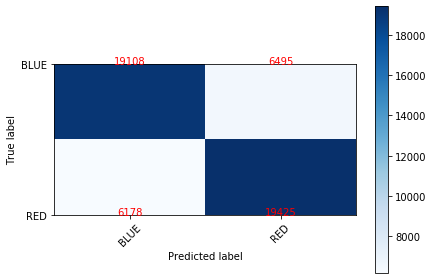

Normalized confusion matrix


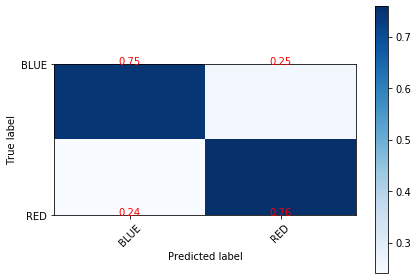

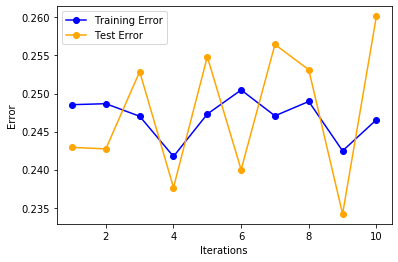

Train results: [0.2485 0.2487 0.247  0.2417 0.2473 0.2505 0.2471 0.249  0.2425 0.2466]
Test  results: [0.2429 0.2427 0.2529 0.2376 0.2548 0.24   0.2564 0.2531 0.2342 0.2602]
Training error mean: 0.2468752016760432
Testing  error mean: 0.24749080074692445


In [5]:
import imblearn
import sklearn
import time
import itertools
import numpy as np

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_validate

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from feature_engine.discretisation import DecisionTreeDiscretiser
from imblearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import svm

from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

from sklearn.metrics import mean_absolute_error

#from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt



X=dfTot.loc [:, 'diffLevel':]
Y=dfTot.loc [:, 'Team_Win']

class_names = ["BLUE","RED"]

#Filters
treeDiscr = DecisionTreeDiscretiser(cv=10, scoring='accuracy',variables=['diffTotGold','diffMinions', 'diffDomRatio','diffJglMinions','diffWardVision','diffTotGoldAvailable'],regression=False)
                                   # param_grid={'max_depth': [15,20,25,30],'min_samples_leaf':[500,1000,5000]})
scaler = MinMaxScaler(feature_range=(0,1))
feat_selector = SelectKBest(chi2,k=10)

#data-mining algorithms
#dmAlg=DecisionTreeClassifier()
#dmAlg=RandomForestClassifier(n_estimators=10,n_jobs=-1,criterion="gini")
#dmAlg = neighbors.KNeighborsClassifier(n_neighbors=11)
#dmAlg = GaussianNB()
dmAlg= LinearSVC()
#dmAlg=svm.SVC(kernel='poly')

pipe = sklearn.pipeline.Pipeline([
    ("treeDiscr", treeDiscr),
    ("scaler",scaler),
    ("feat_selector",feat_selector),
    ("dmAlg", dmAlg)
])


predicted_targets = np.array([])
actual_targets = np.array([])

kf = KFold(n_splits=10)
i=0

start_time = time.time()

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    i=i+1
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    #First apply imbalance learn on the train set.
    #This is applyed not in the pipeline because RandomUnderSampler is not in Sklearn  but in imblearn lib. 

    rus = RandomUnderSampler(replacement=False)
    X_res, Y_res = rus.fit_resample(X_train, Y_train)
    X_train=X_res
    Y_train=Y_res

    pipe=pipe.fit(X_train, Y_train)
    
    # Predict the labels of the test set samples
    predicted_labels = pipe.predict(X_test)
    
    
    # Predict also the train samples in order to calculate the mean_absolute_error on train set
    y_train_data_pred = pipe.predict(X_train)
    
    fold_training_error = mean_absolute_error(Y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, predicted_labels)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)
    
    
    #Append the results obtained at one iteration
    predicted_targets = np.append(predicted_targets, predicted_labels)
    actual_targets = np.append(actual_targets, Y_test)
    
    print("Cross validation "+str(i))

    print(accuracy_score(Y_test, predicted_labels))
    print(classification_report(Y_test,predicted_labels))

stop_time=time.time()

print("\n\n")

#Compute the metrics.

print("final Result")
print("\n")

print("Global accuracy : "+str(accuracy_score(actual_targets, predicted_targets)))
print("Global precision: "+str(precision_score(actual_targets, predicted_targets,average="weighted")))
print("Global recall   : "+str(recall_score(actual_targets, predicted_targets,average="weighted")))
print("Global f-measure: "+str(f1_score(actual_targets, predicted_targets,average="weighted")))
print("Training time   : "+str(stop_time - start_time)+ " Seconds ")
print("\n")

#Final Confusion Matrix
print(classification_report(actual_targets,predicted_targets))
plot_confusion_matrix(predicted_targets, actual_targets)    

plotMeanAbsoluteError(list_training_error,list_testing_error)    


np.set_printoptions(precision=4)
print("Train results: "+str(np.array(list_training_error).ravel()))
print("Test  results: "+str(np.array(list_testing_error).ravel()))

print ("Training error mean: "+ str(np.mean(np.array(list_training_error))))
print ("Testing  error mean: "+ str(np.mean(np.array(list_testing_error))))    

In [ ]:
import pickle

modelName='prova.pkl'
with open(modelName,'wb') as file:
    pipe=pickle.dump(pipe,file)